# Methods for Data Science
### Deep Learning / Neural Networks and TensorFlow

## Contents

[1. Introduction](#introduction)

[2. TensorFlow Tensors and Variables](#tensors_and_variables)

[3. The Sequential class](#sequential)

[4. The tf.data module](#tf.data)

[5. TensorFlow regularisers, Dropout layers and callbacks](#tf_regularisation)

[6. CNNs and feature maps](#cnnsfeaturemaps)

[References](#references)

<a class="anchor" id="introduction"></a>
## Introduction

Welcome to the deep learning / neural networks section of the Methods for Data Science module! 

In this section of the course, you will learn the fundamentals of deep learning models, as well as techniques for how to train, regularise and validate them. 

We will cover widespread deep learning architectures such as the multilayer perceptron (MLP) and convolutional neural network (CNN), with a focus on understanding the mathematical operations and transformations included in these models. We will also look at several popular network optimisation algorithms, as well as the important error backpropagation algorithm, which is central to the training of neural networks. Regularisation techniques covered are weight regularisation, early stopping, and dropout. 

The video content for this material is split into two types. There are standard 'lecture-style' videos, where the core material and theory behind deep learning models is presented, and then there are 'coding tutorial' videos, where you will learn to implement these concepts and ideas in the deep learning framework TensorFlow.

TensorFlow is an open source software library used for machine learning applications, especially deep learning. It uses symbolic mathematics (instead of purely numerical computations), which enables it to perform operations like automatic differentiation on a computational graph such as a neural network. Another major benefit is its ability to perform computations on GPU hardware, potentially leading to large speedups. 

This notebook contains many blank code cells in the sections listed above. The coding tutorial videos will step through the different parts of the TensorFlow library, and show you how to fill in these code cells. The idea is that you should follow along with these videos and code in all the examples yourself. This way, you will gain familiarity in how to use TensorFlow, and you should feel free to pause the video and try things out for yourself to gain a deeper understanding.

Throughout these coding tutorials, it is a good idea to use the [documentation](https://www.tensorflow.org/api_docs/python/tf) as a regular reference for the various functions and classes that we will be looking at. 

You will be able to run this notebook and follow the examples from the coding tutorial videos within the Anaconda environment you have installed for TensorFlow. 

<a class="anchor" id="tensors_and_variables"></a>
## TensorFlow Tensors and Variables

In this section we will introduce some fundamental building blocks and operations in TensorFlow. [Tensors](https://www.tensorflow.org/api_docs/python/tf/Tensor) and [Variables](https://www.tensorflow.org/api_docs/python/tf/Variable) are low-level objects that we will be using all the time in TensorFlow.

#### Tensors
You can think of Tensors as being multidimensional versions of vectors and arrays. Of course, these are the objects that Tensorflow gets its name from. When we build our neural network models, what we’re doing is defining a computational graph, where input data is processed through the layers of the network and sent through the graph all the way to the outputs. Tensors are the objects that get passed around within the graph, and capture those computations within the graph. 

Let’s take a look at some examples to get a better feel for how this works.

In [1]:
import tensorflow as tf

In [3]:
# Create a constant Tensor
a = tf.constant([1,2,3])
print(a)

tf.Tensor([1 2 3], shape=(3,), dtype=int32)


We can see that Tensors have `shape` and `dtype` properties, similar to NumPy arrays.

In [4]:
# Examine shape property
print(a.shape)

(3,)


In [6]:
# Examine dtype property
print(a.dtype)

<dtype: 'int32'>


Tensor objects can have different types, just like NumPy arrays. Take a look [here](https://www.tensorflow.org/api_docs/python/tf) for a complete list of available types.

In [7]:
# Create Tensor objects of different type
str_tensor = tf.constant(["Hello world!"], tf.string)
print(str_tensor)
float_tensor = tf.constant([3.14159, 2.71828], tf.float32)
print(float_tensor)

tf.Tensor([b'Hello world!'], shape=(1,), dtype=string)
tf.Tensor([3.14159 2.71828], shape=(2,), dtype=float32)


In [8]:
# Create a rank-2 Tensor 
b = tf.constant([[1.2,0.4,0.7],[-9.3,4.5,1.1]])
print(b)

tf.Tensor(
[[ 1.2  0.4  0.7]
 [-9.3  4.5  1.1]], shape=(2, 3), dtype=float32)


In [9]:
# Get Tensor rank
print(tf.rank(b))

tf.Tensor(2, shape=(), dtype=int32)


In [10]:
# Create a Tensor with tf.ones
print(tf.ones((2,3)))

tf.Tensor(
[[1. 1. 1.]
 [1. 1. 1.]], shape=(2, 3), dtype=float32)


In [11]:
# Create a Tensor with tf.zeros
print(tf.zeros((3,)))

tf.Tensor([0. 0. 0.], shape=(3,), dtype=float32)


We can convert a TensorFlow Tensor into a NumPy array using the `numpy` method.

In [12]:
# Convert Tensor to NumPy array
b_np = b.numpy()
print(type(b_np))
print(b_np)

<class 'numpy.ndarray'>
[[ 1.2  0.4  0.7]
 [-9.3  4.5  1.1]]


We can compute Tensor multiplication using `tf.tensordot` (see the [docs](https://www.tensorflow.org/api_docs/python/tf/tensordot)). The `axes` argument can be an integer or list of integers. When it is a single integer `n`, the contraction is performed over the last `n` axes of the first Tensor and the first `n` axes of the second Tensor. If it is a list, then the elements of the list specify the axes to contract.

In [15]:
# Compute matrix-vector product
a = tf.cast(a, tf.float32)
print(tf.tensordot(b, a, axes=1))
print(tf.tensordot(b, a, axes=[[1],[0]]))

tf.Tensor([4.1 3. ], shape=(2,), dtype=float32)
tf.Tensor([4.1 3. ], shape=(2,), dtype=float32)


In the case of two rank-2 Tensors, we can use the `tf.linalg.matmul` function. (In fact, we can use rank >= 2 Tensors with `tf.linalg.matmul` - see the [docs](https://www.tensorflow.org/api_docs/python/tf/linalg/matmul).) 

In [16]:
# Use tf.linalg.matmul to compute product
#print(tf.linalg.matmul(b,a))
print(b.shape)
print(a.shape)

(2, 3)
(3,)


Useful operations to manipulate Tensor shapes are `tf.expand_dims`, `tf.squeeze` and `tf.reshape`.

In [17]:
# Add an extra dimension to a Tensor
a = tf.expand_dims(a,1)
print(a.shape)

(3, 1)


In [20]:
# Use tf.matmul, tf.squeeze and tf.reshape
print(tf.reshape(tf.squeeze(tf.linalg.matmul(b,a)),[1,2]))

tf.Tensor([[4.1 3. ]], shape=(1, 2), dtype=float32)


It is also often useful to fill Tensors with random values.

In [21]:
# Create a random normal Tensor
print(tf.random.normal((3,3)))

tf.Tensor(
[[-0.68956274  1.2461493   0.7045689 ]
 [ 0.34032363 -0.32292187 -0.2566734 ]
 [-0.03701935 -0.70217466 -0.62510043]], shape=(3, 3), dtype=float32)


In [22]:
# Create a random integer Tensor
print(tf.random.uniform(shape=(2,4), minval=0,maxval=10, dtype="int32"))

tf.Tensor(
[[3 4 1 3]
 [9 1 5 6]], shape=(2, 4), dtype=int32)


#### McCulloch-Pitts neuron
As an example, we will use Tensors to implement the McCulloch-Pitts neuron for a simple logical function. The McCulloch-Pitts neuron operates on boolean inputs, and uses a threshold activation to produce a boolean output. The function can be written as

$$
f(\mathbf{x}) = 
\begin{cases}
1 \quad \text{if } \sum_i x_i \ge b\\
0 \quad \text{if } \sum_i x_i < b
\end{cases}
$$

In [25]:
# Define the AND function
def logical_and(x):
    x_sum = tf.reduce_sum(x)
    x_geq = tf.math.greater_equal(x_sum, tf.reduce_sum(tf.shape(x)))
    return tf.cast(x_geq, tf.int32)

In [29]:
# Test the AND function with a few examples
print(logical_and(tf.constant([1,1])))
print(logical_and(tf.constant([1,1,0])))
print(logical_and(tf.ones((2,3),dtype=tf.int32)))

tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)


In [30]:
# Define the OR function
def logical_or(x):
    x_sum = tf.reduce_sum(x)
    x_geq = tf.math.greater_equal(x_sum, 1)
    return tf.cast(x_geq, tf.int32)

In [33]:
# Test the OR function with a few examples
print(logical_or(tf.constant([1,0])))
print(logical_or(tf.zeros((3,), dtype=tf.int32)))

tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)


*Exercise.* Define the function for the NOR operation below (all inputs must be zero) for inputs `x`. *Hint: use the* `tf.math.logical_not` *function.*

In [44]:
# Define the NOR function

def logical_nor(x):
    return tf.math.logical_not(logical_or(x) == 1)

In [45]:
# Test the NOR function with a few examples

print(logical_nor(tf.constant([1, 0])))  # False
print(logical_nor(tf.constant([0, 0])))  # True
print(logical_nor(tf.constant([0, 0, 0])))  # True
print(logical_nor(tf.constant([1, 0, 1])))  # False

tf.Tensor(False, shape=(), dtype=bool)
tf.Tensor(True, shape=(), dtype=bool)
tf.Tensor(True, shape=(), dtype=bool)
tf.Tensor(False, shape=(), dtype=bool)


#### Variables
Tensors are *immutable objects*; that is, their state cannot be modified. The operations they encapsulate (or the values of a constant Tensor) are fixed. Variables are special kinds of Tensors that have *mutable state*, so their values can be updated. This is useful for parameters of a model, such as the weights and biases in a neural network.

In [47]:
# Create a TensorFlow Variable
init_val = tf.random.normal((2,2))
u = tf.Variable(init_val)
print(u)

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[-0.19063538, -1.6662703 ],
       [-0.65232295, -0.9422832 ]], dtype=float32)>


This looks very similar to a Tensor. However, Variables come with extra methods for updating their state, such as `assign`, `assign_add` and `assign_sub`.

In [48]:
# Assign a new value to the Variable
new_val = 2. * tf.ones((2,2))
u.assign(new_val)
print(u)

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[2., 2.],
       [2., 2.]], dtype=float32)>


In [49]:
# Add a value to the Variable
increment = tf.constant([[0., 0.], [1., 1.]])
u.assign_add(increment)
print(u)

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[2., 2.],
       [3., 3.]], dtype=float32)>


In [50]:
# Subtract a value from the Variable
decrement = tf.constant([[2., 0.], [2., 0.]])
u.assign_sub(decrement)
print(u)

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[0., 2.],
       [1., 3.]], dtype=float32)>


We will often use Variables in operations within the computational graph. The result of the operation is a Tensor.

In [51]:
# Use a Variable in a simple operation
v = tf.Variable([2.6, -0.4])
s = v + 1
print(s)

tf.Tensor([3.6 0.6], shape=(2,), dtype=float32)


#### The perceptron
The perceptron is also a linear binary classifier, but with more flexible weights. It can be written as the following function

$$
f(\mathbf{x}) = 
\begin{cases}
1 \quad \text{if } \sum_i w_i x_i + b \ge 0\\
0 \quad \text{if } \sum_i w_i x_i + b < 0
\end{cases}
$$

As an example, we will use Tensors and Variables to implement the perceptron classifier.

In [52]:
# Implement the weights and bias as Variables
weights = tf.Variable(tf.constant([1.,0.5]), name="weights")
bias = tf.Variable(tf.constant(-0.5), name="bias")

In [59]:
# Define the perceptron classifier
def perceptron(x):
    return tf.math.greater_equal(tf.tensordot(x, weights, axes=1) + bias, 0.)

In [60]:
# Create a random set of test points
x = tf.random.normal((100, 2))

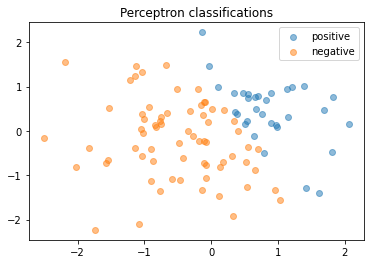

In [67]:
# Plot the points coloured by class prediction
import matplotlib.pyplot as plt
preds = perceptron(x)
positive_class = x[preds]
negative_class = x[tf.math.logical_not(preds)]
plt.scatter(positive_class[:,0],positive_class[:,1],alpha=0.5,label="positive")
plt.scatter(negative_class[:,0],negative_class[:,1],alpha=0.5,label="negative")
plt.title("Perceptron classifications")
plt.legend()

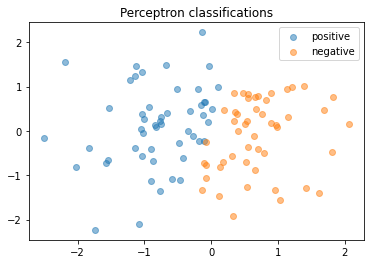

In [68]:
# Update the weights and bias and re-plot
weights.assign_sub(tf.constant([1.5,0.3]))
bias.assign_add(tf.constant(0.5))
preds = perceptron(x)
positive_class = x[preds]
negative_class = x[tf.math.logical_not(preds)]
plt.scatter(positive_class[:,0],positive_class[:,1],alpha=0.5,label="positive")
plt.scatter(negative_class[:,0],negative_class[:,1],alpha=0.5,label="negative")
plt.title("Perceptron classifications")
plt.legend()

*Exercise.* Can you find weights and bias values to implement the NOT gate for $x\in\{0, 1\}$ and the XOR gate for $x\in\{0, 1\}^2$? If yes, what are the values? If no, why not?

For the not gate, let $w=-1$ and $b=1$. This gives $-x+1=1$ when $x=0$ and $-x+1=0$ when $x=1$.
For the xor gate, there's no set of weights or bias values to implement the xor gate because the $3$ unknowns $w_1, w_2, b$ cannot satisfy the all of the $4$ linearly independent equations.

<a class="anchor" id="sequential"></a>
## The Sequential class

There are multiple ways to build and apply deep learning models in Tensorflow, from high-level, quick and easy-to-use APIs, to low-level operations. In this section you will walk through the high-level Keras API for quickly building, training, evaluating and predicting from deep learning models. In particular, you will see how to use the `Sequential` class to implement MLP models.

In [1]:
import tensorflow as tf

#### The `Dense` layer

We will see how to build MLP models using the `Dense` layer class from TensorFlow. This class implements the layer transformation $
\mathbf{h}^{(k+1)} = \sigma\left( \mathbf{W}^{(k)}\mathbf{h}^{(k)} + \mathbf{b}^{(k)} \right)
$.

In [2]:
# Create a Dense layer
from tensorflow.keras.layers import Dense
dense_layer = Dense(4, activation="sigmoid")

In [3]:
# Inspect the layer parameters
print(dense_layer.variables)

[]


TensorFlow models are designed to process batches of data at once, and always expect inputs to have a batch dimension in the first axis. For example, a batch of 16 inputs, each of which is a length 4 vector, should have a shape `[16, 4]`.

In [4]:
# Call the dense layer on an input to create the weights
x = tf.ones((2,6))
y = dense_layer(x)
print(y)

tf.Tensor(
[[0.67782295 0.25448608 0.49759066 0.6276593 ]
 [0.67782295 0.25448608 0.49759066 0.6276593 ]], shape=(2, 4), dtype=float32)


In [5]:
# Inspect the layer parameters
print(dense_layer.variables)

[<tf.Variable 'dense/kernel:0' shape=(6, 4) dtype=float32, numpy=
array([[ 0.12209761, -0.44115642,  0.09196937,  0.42076004],
       [-0.2902682 ,  0.00111824,  0.5972502 ,  0.6425307 ],
       [ 0.23674774, -0.5830678 , -0.06996405, -0.12644678],
       [ 0.12578398, -0.7090193 ,  0.70723987, -0.4895848 ],
       [ 0.567582  ,  0.05749053, -0.565104  ,  0.02330935],
       [-0.01815832,  0.599807  , -0.7710289 ,  0.05161995]],
      dtype=float32)>, <tf.Variable 'dense/bias:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>]


Note that the parameters of the layer are Variable objects. This makes sense, as recall that Variables are mutable, and we will want to modify them during network training.

#### MLP model

To construct an MLP model, we stack multiple `Dense` layers together by passing them in a list to the `Sequential` API:

In [10]:
# Build an MLP model
from tensorflow.keras.models import Sequential
mlp = Sequential([
    Dense(4, activation="relu"),
    Dense(4, activation="relu"),
    Dense(3)
])

The default value for the `activation` keyword argument is `None`, in which case no activation (linear activation) is applied.

In [81]:
# Call the model on an input to create the weights
x = tf.random.normal((2,6))
y = mlp(x)
print(y)

tf.Tensor(
[[-0.0674302   0.00951186 -0.13320622]
 [ 0.13453618  0.01466721 -0.4919223 ]], shape=(2, 3), dtype=float32)


It is worth knowing that the `Sequential` class itself inherits from the `Layer` class, so all the same properties and methods are also available for `Sequential` models.

In [82]:
# Inspect the model parameters
print(mlp.weights)

[<tf.Variable 'dense_1/kernel:0' shape=(6, 4) dtype=float32, numpy=
array([[ 0.54500854, -0.43929616,  0.31956077,  0.6352067 ],
       [-0.06964421,  0.5523033 , -0.29795066,  0.39605594],
       [-0.77426004,  0.18587738, -0.7651007 ,  0.00945365],
       [-0.699563  ,  0.5279952 , -0.7343365 ,  0.35708165],
       [ 0.6831924 , -0.1909566 , -0.4471426 , -0.6219411 ],
       [-0.4418623 , -0.41599622,  0.7067075 ,  0.09114444]],
      dtype=float32)>, <tf.Variable 'dense_1/bias:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>, <tf.Variable 'dense_2/kernel:0' shape=(4, 4) dtype=float32, numpy=
array([[-0.02633071, -0.32579106, -0.48510343,  0.20988053],
       [ 0.5697736 ,  0.11363083, -0.2845897 ,  0.16364902],
       [ 0.7499494 ,  0.6829366 , -0.09886801, -0.30247784],
       [-0.00607556,  0.669782  , -0.11370331,  0.48150188]],
      dtype=float32)>, <tf.Variable 'dense_2/bias:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>, <

In [85]:
# Inspect the model layers
print(mlp.layers[1].kernel)

<tf.Variable 'dense_2/kernel:0' shape=(4, 4) dtype=float32, numpy=
array([[-0.02633071, -0.32579106, -0.48510343,  0.20988053],
       [ 0.5697736 ,  0.11363083, -0.2845897 ,  0.16364902],
       [ 0.7499494 ,  0.6829366 , -0.09886801, -0.30247784],
       [-0.00607556,  0.669782  , -0.11370331,  0.48150188]],
      dtype=float32)>


In [89]:
# Print the model summary
print(mlp.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (2, 4)                    28        
_________________________________________________________________
dense_2 (Dense)              (2, 4)                    20        
_________________________________________________________________
dense_3 (Dense)              (2, 3)                    15        
Total params: 63
Trainable params: 63
Non-trainable params: 0
_________________________________________________________________
None


`Sequential` models (and layers) also have `trainable_weights` and `non_trainable_weights` properties, as weights (Variables) that are created can be set to trainable or non-trainable.

#### Train an MLP model on the MNIST dataset
Multidimensional inputs (i.e., with rank >= 2) can also be processed by an MLP network by simply unrolling, or flattening the dimensions. This can be done easily using the `Flatten` layer.

In [6]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

Several datasets are available to load using the Keras API, see [the docs](https://www.tensorflow.org/api_docs/python/tf/keras/datasets).

In [7]:
# Inspect the data shapes
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


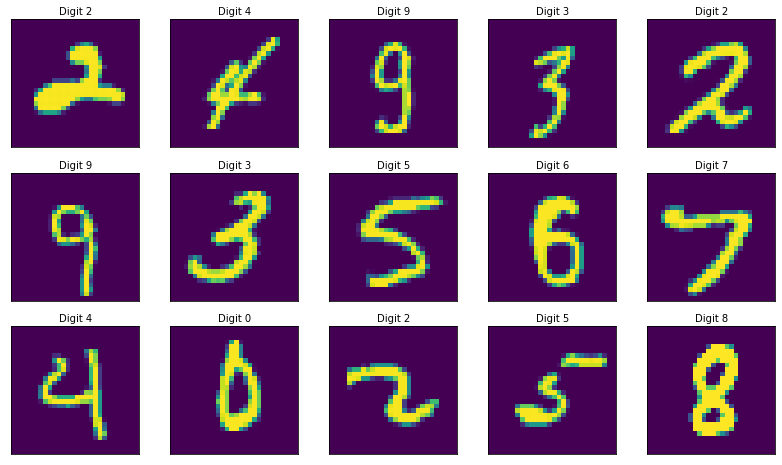

In [8]:
# View a few training data examples

import numpy as np
import matplotlib.pyplot as plt

n_rows, n_cols = 3, 5
random_inx = np.random.choice(x_train.shape[0], n_rows * n_cols, replace=False)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 8))
fig.subplots_adjust(hspace=0.2, wspace=0.1)

for n, i in enumerate(random_inx):
    row = n // n_cols
    col = n % n_cols
    axes[row, col].imshow(x_train[i])
    axes[row, col].get_xaxis().set_visible(False)
    axes[row, col].get_yaxis().set_visible(False)
    axes[row, col].text(10., -1.5, f'Digit {y_train[i]}')
plt.show()

In [11]:
# Create an MNIST classifier model
from tensorflow.keras.layers import Flatten
mnist_model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(400, activation="tanh"),
    Dense(400, activation="tanh"),
    Dense(400, activation="tanh"),
    Dense(400, activation="tanh"),
    Dense(400, activation="tanh"),
    Dense(10, activation="softmax")
])
print(mnist_model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 400)               314000    
_________________________________________________________________
dense_5 (Dense)              (None, 400)               160400    
_________________________________________________________________
dense_6 (Dense)              (None, 400)               160400    
_________________________________________________________________
dense_7 (Dense)              (None, 400)               160400    
_________________________________________________________________
dense_8 (Dense)              (None, 400)               160400    
_________________________________________________________________
dense_9 (Dense)              (None, 10)               

To train the model, we need to specify a loss function to minimise, and an optimisation algorithm. The average negative log-likelihood on the training set is given by the categorical cross entropy

$$
L(\theta) = -\frac{1}{|\mathcal{D}_{train}|} \sum_{x_i\in\mathcal{D}_{train}}\sum_{j=1}^{10} \tilde{y}_{ij} \ln f_\theta(x_i)_j,
$$

where $f_\theta$ is the neural network function (with parameters $\theta$) that outputs a length 10 probability vector $f_\theta(x_i)\in\mathbb{R}^{10}$ for an input example image $x_i\in\mathbb{R}^{28\times 28}$, and $\tilde{y}_{ij}$ is 1 if the correct label for example $i$ is $j$, and 0 otherwise.

As our labels `y_train` and `y_test` are in sparse form, we use the `sparse_categorical_crossentropy` loss function. We also will use the stochastic gradient descent (SGD) optimiser.

In [12]:
# Compile the model
mnist_model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

The image data is filled with integer pixel values from 0 to 255. To facilitate the training, we rescale the values to the interval $[0, 1]$.

In [13]:
# Rescale the image data
x_train = x_train / 255.
x_test = x_test / 255.

In [14]:
# Train the model
history = mnist_model.fit(x_train, y_train, epochs=20, batch_size=64)

Epoch 1/20
938/938 [==============================] - 4s 4ms/step - loss: 0.8431 - accuracy: 0.7729
Epoch 2/20
938/938 [==============================] - 3s 3ms/step - loss: 0.3139 - accuracy: 0.9084
Epoch 3/20
938/938 [==============================] - 3s 3ms/step - loss: 0.2652 - accuracy: 0.9218
Epoch 4/20
938/938 [==============================] - 3s 3ms/step - loss: 0.2401 - accuracy: 0.9308
Epoch 5/20
938/938 [==============================] - 3s 3ms/step - loss: 0.2219 - accuracy: 0.9357
Epoch 6/20
938/938 [==============================] - 3s 4ms/step - loss: 0.2021 - accuracy: 0.9424
Epoch 7/20
938/938 [==============================] - 3s 4ms/step - loss: 0.1794 - accuracy: 0.9488
Epoch 8/20
938/938 [==============================] - 3s 3ms/step - loss: 0.1625 - accuracy: 0.9539
Epoch 9/20
938/938 [==============================] - 3s 4ms/step - loss: 0.1513 - accuracy: 0.9556
Epoch 10/20
938/938 [==============================] - 3s 4ms/step - loss: 0.1385 - accuracy: 0.9587

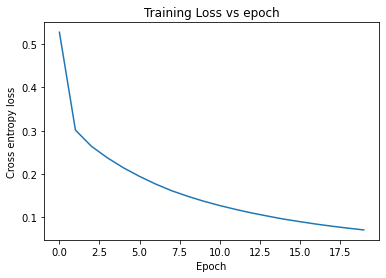

In [16]:
# Plot the learning curve
import matplotlib.pyplot as plt
plt.plot(history.history["loss"])
plt.xlabel("Epoch")
plt.ylabel("Cross entropy loss")
plt.title("Training Loss vs epoch")
plt.show()

In [17]:
# Evaluate the model on the test set
mnist_model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0903 - accuracy: 0.9709


[0.09028927981853485, 0.9708999991416931]

In [18]:
# Get predictions from model
preds = mnist_model.predict(x_test)
print(preds.shape)

(10000, 10)


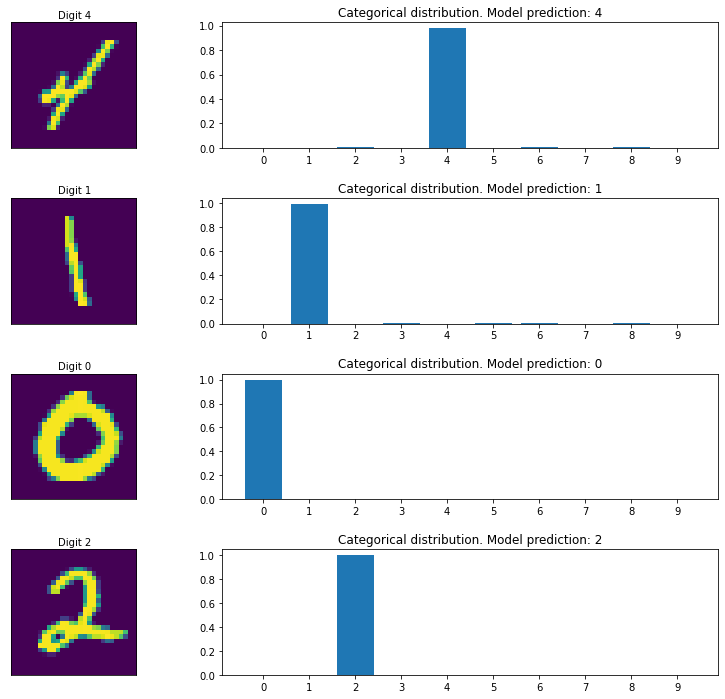

In [19]:
# Plot some predicted categorical distributions

num_test_images = x_test.shape[0]

random_inx = np.random.choice(num_test_images, 4)
random_preds = preds[random_inx, ...]
random_test_images = x_test[random_inx, ...]
random_test_labels = y_test[random_inx, ...]

fig, axes = plt.subplots(4, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)

for i, (prediction, image, label) in enumerate(zip(random_preds, random_test_images, random_test_labels)):
    axes[i, 0].imshow(np.squeeze(image))
    axes[i, 0].get_xaxis().set_visible(False)
    axes[i, 0].get_yaxis().set_visible(False)
    axes[i, 0].text(10., -1.5, f'Digit {label}')
    axes[i, 1].bar(np.arange(len(prediction)), prediction)
    axes[i, 1].set_xticks(np.arange(len(prediction)))
    axes[i, 1].set_title(f"Categorical distribution. Model prediction: {np.argmax(prediction)}")
plt.show()

*Exercise.* The MNIST dataset is an easy dataset, and the above model is far from optimal. Try experimenting with longer training times and/or model architecture changes to see if you can improve on the performance.

<a class="anchor" id="tf.data"></a>
## The `tf.data` module

In this section we will introduce a standard data processing pipeline in TensorFlow, using the `tf.data` module.

In [127]:
import tensorflow as tf

#### The Fashion-MNIST dataset
We will build a deep learning classifier on the Fashion-MNIST dataset to demonstrate the use of the `tf.data` module. First we load the dataset using the Keras API.

In [128]:
# Load the Fashion-MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [129]:
# Get the class labels

classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]

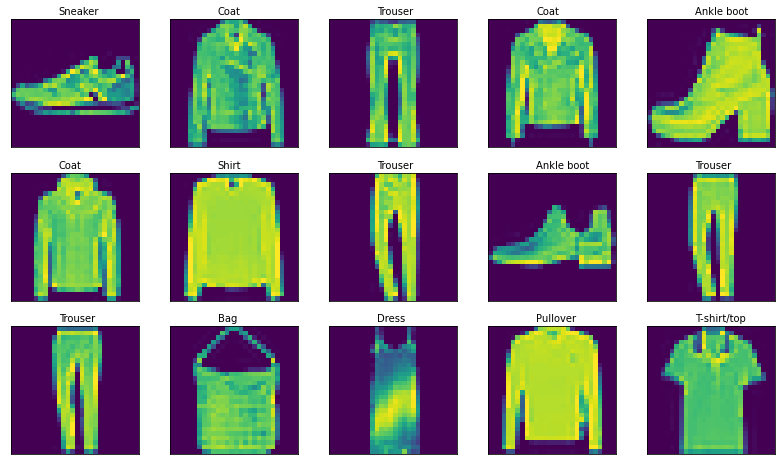

In [130]:
# View a few training data examples

import numpy as np
import matplotlib.pyplot as plt

n_rows, n_cols = 3, 5
random_inx = np.random.choice(x_train.shape[0], n_rows * n_cols, replace=False)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 8))
fig.subplots_adjust(hspace=0.2, wspace=0.1)

for n, i in enumerate(random_inx):
    row = n // n_cols
    col = n % n_cols
    axes[row, col].imshow(x_train[i])
    axes[row, col].get_xaxis().set_visible(False)
    axes[row, col].get_yaxis().set_visible(False)
    axes[row, col].text(10., -1.5, f'{classes[y_train[i]]}')
plt.show()

In [132]:
# Build the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

fashion_mnist_model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(64, activation="relu"),
    Dense(64, activation="relu"),
    Dense(10)
], name="fashion_mnist_classifier")

In [133]:
# Print the model summary
print(fashion_mnist_model.summary())

Model: "fashion_mnist_classifier"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_19 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_20 (Dense)             (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
None


The main class that we will be working with is the `Dataset` class from the `tf.data` module.

In [134]:
# Load the data into tf.data.Dataset objects
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))
print(train_dataset.element_spec)

(TensorSpec(shape=(28, 28), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.uint8, name=None))


In [135]:
# Iterate over the Dataset object
for inputs, labels in train_dataset.take(2):
    print(type(inputs))
    print(type(labels))
    print(inputs.shape)
    print(labels.shape)

<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'tensorflow.python.framework.ops.EagerTensor'>
(28, 28)
()
<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'tensorflow.python.framework.ops.EagerTensor'>
(28, 28)
()


`Dataset` objects come with `map` and `filter` methods for data preprocessing on the fly. For example, we can normalise the pixel values to the range $[0, 1]$ with the `map` method:

In [136]:
# Normalise the pixel values
def normalise_pixels(image, label):
    return tf.cast(image, tf.float32)/ 255., label

train_dataset = train_dataset.map(normalise_pixels)
test_dataset = test_dataset.map(normalise_pixels)
print(train_dataset.element_spec)

(TensorSpec(shape=(28, 28), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.uint8, name=None))


We could also filter out data examples according to some criterion with the `filter` method. For example, if we wanted to exclude all data examples with label $9$ from the training:

In [137]:
# Filter out all examples with label 9 (ankle boot)
train_dataset = train_dataset.filter(lambda x, y: tf.math.logical_not(tf.equal(y, 9)))
test_dataset = test_dataset.filter(lambda x, y: tf.math.logical_not(tf.equal(y, 9)))

In [139]:
# Shuffle the training dataset
train_dataset = train_dataset.shuffle(buffer_size=1024)

In [140]:
# Batch the datasets
batch_size = 64
train_dataset = train_dataset.batch(batch_size)
test_dataset = test_dataset.batch(batch_size)

In [141]:
# Print the element_spec
print(train_dataset.element_spec)

(TensorSpec(shape=(None, 28, 28), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.uint8, name=None))


In [142]:
# Compile and fit the model
sgd  = tf.keras.optimizers.SGD(learning_rate=0.005)
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

fashion_mnist_model.compile(optimizer=sgd, loss=loss_fn, metrics=["accuracy"])
history = fashion_mnist_model.fit(train_dataset, epochs=10)

Epoch 1/10
844/844 [==============================] - 4s 4ms/step - loss: 1.6871 - accuracy: 0.4961
Epoch 2/10
844/844 [==============================] - 3s 4ms/step - loss: 0.7343 - accuracy: 0.7518
Epoch 3/10
844/844 [==============================] - 3s 4ms/step - loss: 0.6128 - accuracy: 0.7916
Epoch 4/10
844/844 [==============================] - 3s 4ms/step - loss: 0.5561 - accuracy: 0.8115
Epoch 5/10
844/844 [==============================] - 3s 4ms/step - loss: 0.5248 - accuracy: 0.8211
Epoch 6/10
844/844 [==============================] - 3s 4ms/step - loss: 0.5010 - accuracy: 0.8286
Epoch 7/10
844/844 [==============================] - 3s 4ms/step - loss: 0.4841 - accuracy: 0.8336
Epoch 8/10
844/844 [==============================] - 3s 4ms/step - loss: 0.4703 - accuracy: 0.8374
Epoch 9/10
844/844 [==============================] - 3s 3ms/step - loss: 0.4577 - accuracy: 0.8421
Epoch 10/10
844/844 [==============================] - 3s 4ms/step - loss: 0.4499 - accuracy: 0.8445

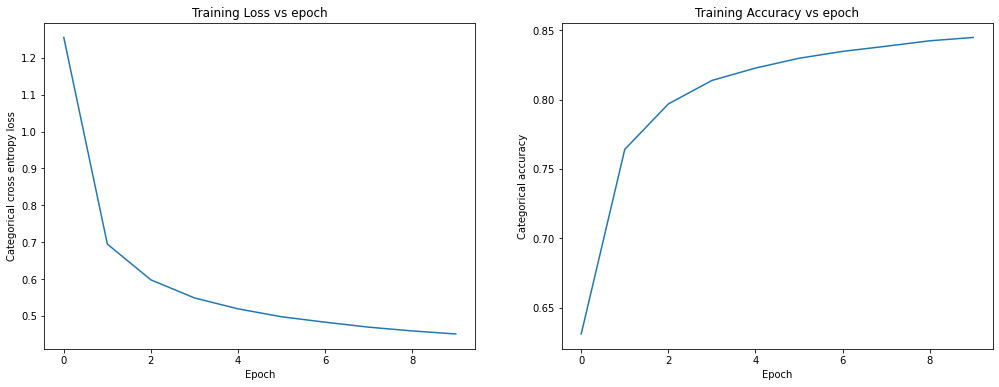

In [143]:
# Plot the learning curves

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(17, 6))
fig.add_subplot(121)
plt.plot(history.history['loss'])
plt.xlabel("Epoch")
plt.ylabel("Categorical cross entropy loss")
plt.title("Training Loss vs epoch")
fig.add_subplot(122)
plt.plot(history.history['accuracy'])
plt.xlabel("Epoch")
plt.ylabel("Categorical accuracy")
plt.title("Training Accuracy vs epoch")
plt.show()

In [145]:
# Evaluate the model on the test set
fashion_mnist_model.evaluate(test_dataset)

141/141 [==============================] - 1s 4ms/step - loss: 0.4788 - accuracy: 0.8309


[0.4788359999656677, 0.8308888673782349]

In [147]:
# Get predictions from model
for images, labels in test_dataset.take(1):
    preds = fashion_mnist_model.predict(images)
    preds = tf.nn.softmax(preds, axis=-1).numpy()

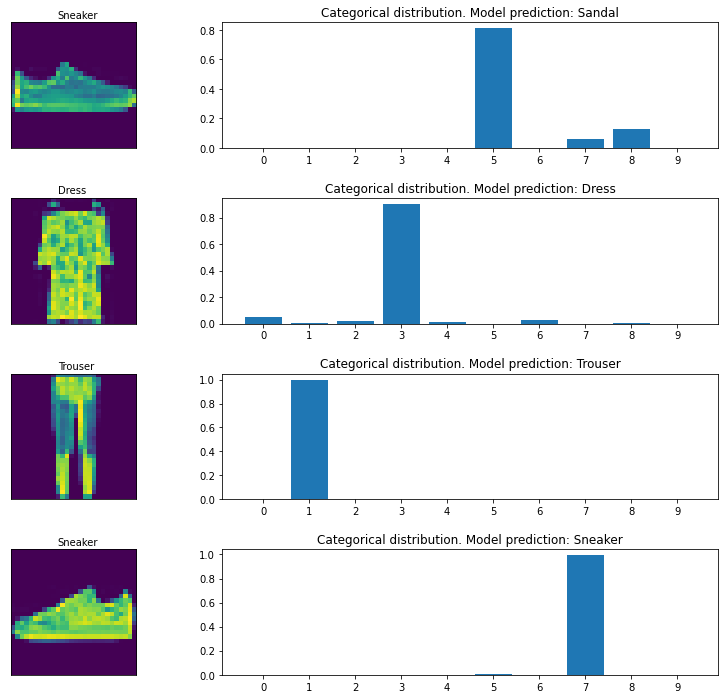

In [148]:
# Plot some predicted categorical distributions

num_test_images = preds.shape[0]

random_inx = np.random.choice(num_test_images, 4)
random_preds = preds[random_inx, ...]
random_test_images = images.numpy()[random_inx, ...]
random_test_labels = labels.numpy()[random_inx, ...]

fig, axes = plt.subplots(4, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)

for i, (prediction, image, label) in enumerate(zip(random_preds, random_test_images, random_test_labels)):
    axes[i, 0].imshow(np.squeeze(image))
    axes[i, 0].get_xaxis().set_visible(False)
    axes[i, 0].get_yaxis().set_visible(False)
    axes[i, 0].text(10., -1.5, f'{classes[label]}')
    axes[i, 1].bar(np.arange(len(prediction)), prediction)
    axes[i, 1].set_xticks(np.arange(len(prediction)))
    axes[i, 1].set_title(f"Categorical distribution. Model prediction: {classes[np.argmax(prediction)]}")
plt.show()

_Exercise._ Rewrite the model to make it a binary classifier, and change the dataset processing steps above, to map 'Sandal', 'Sneaker' and 'Ankle boot' to a single label 0, and all other categories to label 1.

<a class="anchor" id="tf_regularisation"></a>
## TensorFlow regularisers, Dropout layers and callbacks

In this section we will build on what we have covered already with the `Sequential` API, and include weight regularisers, `Dropout` layers, and introduce callback objects - these are very useful objects for dynamically performing operations during the training run. An example is the `EarlyStopping` callback.

In [149]:
import tensorflow as tf

For this tutorial we will use the diabetes dataset from `sklearn`.

In [150]:
# Load the diabetes dataset
from sklearn.datasets import load_diabetes
diabetes_dataset = load_diabetes()

In [152]:
# Print dataset description
print(diabetes_dataset["DESCR"])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

In [154]:
# Get the input and target data
print(diabetes_dataset.keys())
data = diabetes_dataset["data"]
targets = diabetes_dataset["target"]

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])


In [155]:
# Normalise the target data (this will make clearer training curves)
targets = (targets - targets.mean())/targets.std()

In [156]:
# Partition the data into training and validation sets
from sklearn.model_selection import train_test_split
train_data, val_data, train_targets, val_targets = train_test_split(data, targets, test_size=0.2)
print(train_data.shape)
print(val_data.shape)
print(train_targets.shape)
print(val_targets.shape)

(353, 10)
(89, 10)
(353,)
(89,)


In [158]:
# Load the data into training, validation and test Dataset objects
train_dataset = tf.data.Dataset.from_tensor_slices((train_data, train_targets))
val_dataset = tf.data.Dataset.from_tensor_slices((val_data, val_targets))

train_dataset = train_dataset.shuffle(353)

train_dataset = train_dataset.batch(128)
val_dataset = val_dataset.batch(89)

train_dataset = train_dataset.prefetch(tf.data.experimental.AUTOTUNE)

In [159]:
# Build the MLP model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(256, activation="relu", input_shape=(train_data.shape[-1],)),
    Dense(256, activation="relu"),
    Dense(256, activation="relu"),
    Dense(1)
])

In [160]:
# Print the model summary
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 256)               2816      
_________________________________________________________________
dense_22 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_23 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 257       
Total params: 134,657
Trainable params: 134,657
Non-trainable params: 0
_________________________________________________________________
None


In [161]:
# Compile the model
model.compile(optimizer="adam", loss="mse")

In [162]:
# Train the model, including validation
history = model.fit(train_dataset, epochs=100, validation_data=val_dataset, verbose=False)

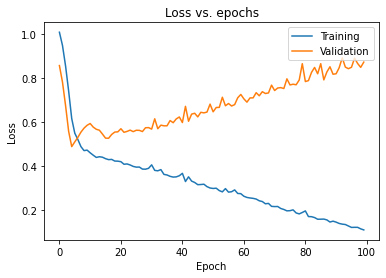

In [163]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

#### Regularise the model

Both $\mathcal{l}^2$ and $\mathcal{l}^1$ regularisation can easily be included using the `kernel_regularizer` and `bias_regularizer` keyword arguments in the `Dense` layer.

Dropout can also be easily included as an additional layer of our model.

In [165]:
# Redefine the model using l2 regularisation and dropout
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

l2_coeff = 1e-5
rate = 0.5
def get_regularised_model():
    model = Sequential([
        Dense(256, kernel_regularizer=regularizers.l2(l2_coeff), activation="relu", input_shape=(train_data.shape[-1],)),
        Dropout(rate),
        Dense(256, kernel_regularizer=regularizers.l2(l2_coeff), activation="relu"),
        Dropout(rate),
        Dense(256, kernel_regularizer=regularizers.l2(l2_coeff), activation="relu"),
        Dropout(rate),
        Dense(1)
    ])
    return model
model = get_regularised_model()

In [166]:
# Compile the model
model.compile(optimizer="adam", loss="mse")

In [167]:
# Train the model, including validation
history = model.fit(train_dataset, epochs=100, validation_data=val_dataset, verbose=False)

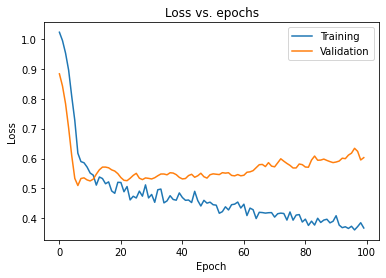

In [168]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

The $\mathcal{l}^2$ regularisation and dropout have helped to reduce the overfitting of the model. 


#### Callbacks
We can go one step further and introduce early stopping as well, and save the model weights at the best validation score. We can do this with callbacks.

In [185]:
# Create a new model
model = get_regularised_model()

In [186]:
# Compile the model
model.compile(optimizer="adam", loss="mse", metrics=["mae"])

The `EarlyStopping` callback is a built-in callback in the `tf.keras.callbacks` module. You can see a complete list of built-in callbacks [here](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks).

In [187]:
# Create an EarlyStopping callback
earlystopping = tf.keras.callbacks.EarlyStopping(monitor="val_mae", patience=10)

In [188]:
# Train the model, including validation
history = model.fit(train_dataset, epochs=100, validation_data=val_dataset, verbose=False, callbacks=[earlystopping])

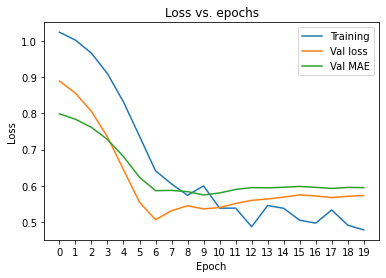

In [189]:
# Plot the training and validation metrics

import numpy as np

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history["val_mae"])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.xticks(np.arange(len(history.history['loss'])))
plt.legend(['Training', 'Val loss',"Val MAE"], loc='upper right')
plt.show()

_Exercise._ Take a look at some more of the callbacks available in the [callbacks module](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks) in TensorFlow, and have a go at implemented some of them in your model here.

<a class="anchor" id="cnnsfeaturemaps"></a>
## CNNs and feature maps

In this section we will use the `Conv2D` and `MaxPool2D` layer to implement the convolution and pooling operations described above, and see how these easily fits into our existing model-building workflow.

We will also see the effect of different kernel tensor choices on the output feature maps, and look at more complex feature maps from a pre-trained model.

In [190]:
import tensorflow as tf

The `Conv2D` and `MaxPool2D` classes are imported from the `tf.keras.layers` module just as the `Flatten` and `Dense` layers we have already worked with. Note that there are also 1-D and 3-D variants of these layers available, which both work in a similar way.

In [191]:
# Define a dummy model with Conv2D and MaxPool2D layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D

model = Sequential([
    Conv2D(8, (3, 5), activation="relu", input_shape=(32, 32, 3)),
    MaxPool2D((2, 2)),
    Conv2D(16, 3, activation="relu"),
    MaxPool2D(2)
])

In [192]:
# Print the model summary
print(model.summary())

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 28, 8)         368       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 14, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 12, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 16)          0         
Total params: 1,536
Trainable params: 1,536
Non-trainable params: 0
_________________________________________________________________
None


In [194]:
# Inspect the layer variables' shapes
print(model.layers[0].kernel.shape)
print(model.layers[0].bias.shape)

print(model.layers[2].kernel.shape)
print(model.layers[2].bias.shape)

(3, 5, 3, 8)
(8,)
(3, 3, 8, 16)
(16,)


#### Edge detection filters
The kernels (or filters) in CNNs are typically learned with backpropagation. However, simple low-level features such as edge detection kernels can also be designed by hand. In this section we will see the output of such low-level kernels.

In [195]:
# Define a simple model with a Conv2D layer
model = Sequential([
    Conv2D(1, (3, 3), activation=None, use_bias=False, input_shape=(None, None, 1))
])

A shape dimension of `None` indicates that the model can take flexible input sizes in this dimension.

In [196]:
# Inspect the model's weights
model.weights

[<tf.Variable 'conv2d_2/kernel:0' shape=(3, 3, 1, 1) dtype=float32, numpy=
 array([[[[ 0.11867499]],
 
         [[ 0.16563892]],
 
         [[ 0.09341329]]],
 
 
        [[[-0.03346711]],
 
         [[-0.49264544]],
 
         [[ 0.19994378]]],
 
 
        [[[-0.08664858]],
 
         [[ 0.3731569 ]],
 
         [[-0.11433321]]]], dtype=float32)>]

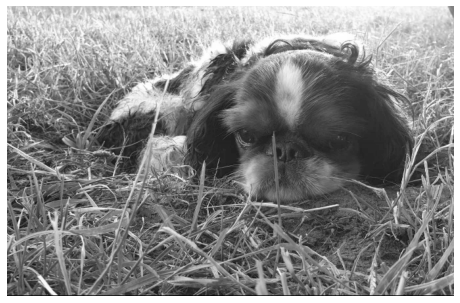

In [205]:
# Load an image as grayscale

import matplotlib.pyplot as plt

image = tf.io.read_file("./figures/oscar.png")
image = tf.io.decode_png(image, channels=1)
plt.figure(figsize=(8, 6))
plt.imshow(image[:,:,0], cmap='gray')
plt.axis('off')
plt.show()

A simple and intuitive edge detection kernel is the [Sobel operator](https://en.wikipedia.org/wiki/Sobel_operator):

In [207]:
# Define simple edge detection filters
sobel_x = tf.constant([[1,0,-1],[2,0,-2],[1,0,-1]], dtype=tf.float32)
sobel_y = tf.constant([[1,2,1],[0,0,0],[-1,-2,-1]], dtype=tf.float32)

print(sobel_x)
print(sobel_y)

tf.Tensor(
[[ 1.  0. -1.]
 [ 2.  0. -2.]
 [ 1.  0. -1.]], shape=(3, 3), dtype=float32)
tf.Tensor(
[[ 1.  2.  1.]
 [ 0.  0.  0.]
 [-1. -2. -1.]], shape=(3, 3), dtype=float32)


In [208]:
# Set the model kernel
def assign_filter(arr):
    model.weights[0].assign(arr[:,:,tf.newaxis, tf.newaxis])

In [214]:
# Compute the feature maps
assign_filter(sobel_x)
gx = model(image[None, ...])[0]

assign_filter(sobel_y)
gy = model(image[None, ...])[0]

g  = tf.sqrt(tf.square(gx) + tf.square(gy))

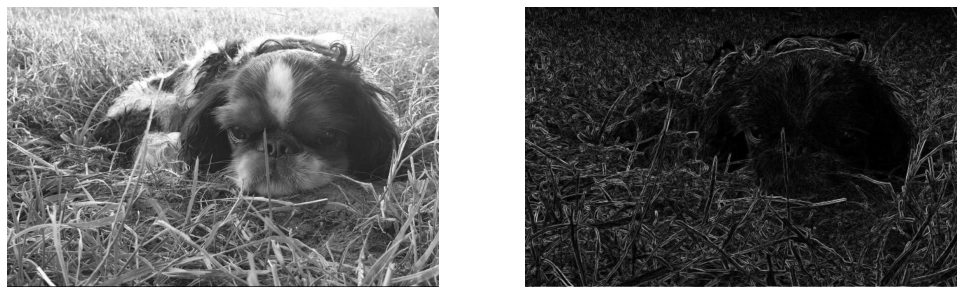

In [223]:
# View the image and feature map

fig = plt.figure(figsize=(17, 6))
fig.add_subplot(121)
plt.imshow(image[:,:,0], cmap='gray')
plt.axis('off')
fig.add_subplot(122)
plt.imshow(g[:,:,0], cmap='gray')  # First gx, then gy, then g
plt.axis('off')
plt.show()  # After executing, show the forehead markings with the cursor (after both gx and gy)

#### Extract learned features from a pre-trained model
In this section we will load a CNN model that has been pre-trained on the [ImageNet](http://www.image-net.org) dataset, which is a large scale image classification dataset which to date has over 20,000 categories and over 14 million images. Large deep learning models trained on this dataset tend to learn general, useful representations of image features that can be used for a range of image processing tasks.

Below we will load the VGG-19 model ([Simonyan & Zisserman 2015](#Simonyan15)), which is available to load as a pre-trained model in the [`tf.keras.applications`](https://www.tensorflow.org/api_docs/python/tf/keras/applications) module. This might take a minute or two to download the first time you run the cell.

In [227]:
# Load the VGG-19 model
vgg = tf.keras.applications.VGG19(weights="imagenet", include_top=False)

80142336/80134624 [==============================] - 12s 0us/step


In [228]:
# Print the model summary
print(vgg.summary())

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

We will visualise the features extracted by this model at different levels of hierarchy for the following image:

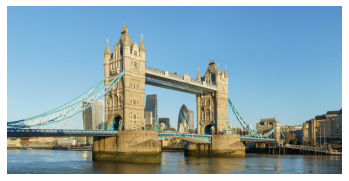

In [246]:
# Load a colour image
image = tf.io.read_file("./figures/tower_bridge.jpg")
image = tf.io.decode_jpeg(image, channels=3)
plt.figure(figsize=(6, 10))
plt.imshow(image)
plt.axis('off')
plt.show()

We will use the [functional API](https://www.tensorflow.org/guide/keras/functional) to create a multi-output model that outputs different hidden layer outputs within the model.

In [247]:
# Define the multi-output model
from tensorflow.keras.models import Model

inputs = vgg.inputs
layer_names = ["block1_conv2","block2_conv2","block3_conv4","block4_conv4","block5_conv4"]
outputs = [vgg.get_layer(layer_name).output for layer_name in layer_names]
vgg_features = Model(inputs=inputs, outputs=outputs)

In [248]:
# View the model inputs and outputs Tensors
print(vgg_features.input)
vgg_features.outputs

KerasTensor(type_spec=TensorSpec(shape=(None, None, None, 3), dtype=tf.float32, name='input_2'), name='input_2', description="created by layer 'input_2'")


[<KerasTensor: shape=(None, None, None, 64) dtype=float32 (created by layer 'block1_conv2')>,
 <KerasTensor: shape=(None, None, None, 128) dtype=float32 (created by layer 'block2_conv2')>,
 <KerasTensor: shape=(None, None, None, 256) dtype=float32 (created by layer 'block3_conv4')>,
 <KerasTensor: shape=(None, None, None, 512) dtype=float32 (created by layer 'block4_conv4')>,
 <KerasTensor: shape=(None, None, None, 512) dtype=float32 (created by layer 'block5_conv4')>]

In [249]:
# Extract the hierarchical features for this image
image_processed = tf.keras.applications.vgg19.preprocess_input(image)
features = vgg_features(image_processed[tf.newaxis, ...])
features = [image] + features

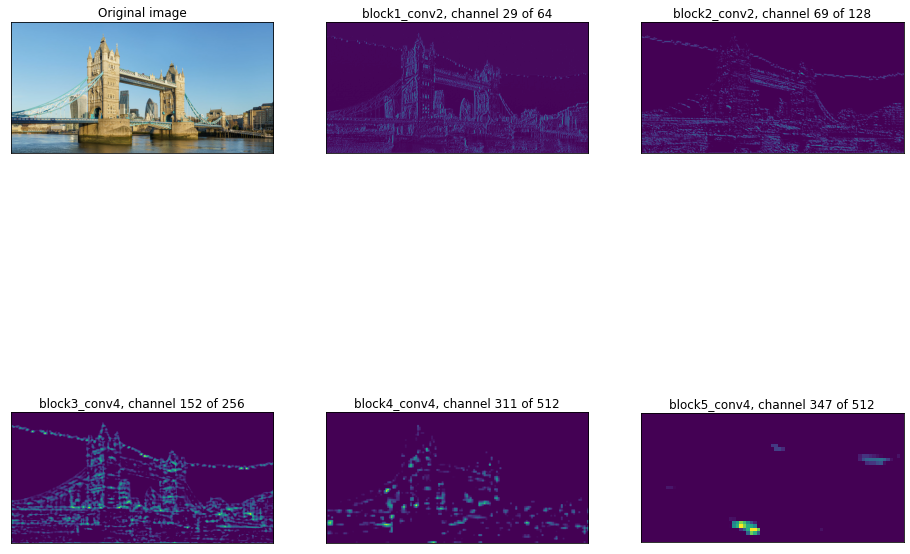

In [250]:
# Visualise the features

import numpy as np

n_rows, n_cols = 2, 3
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 14))
fig.subplots_adjust(hspace=0.05, wspace=0.2)

for i in range(len(features)):
    feature_map = features[i]
    num_channels = feature_map.shape[-1]
    row = i // n_cols
    col = i % n_cols
    if i == 0:
        axes[row, col].imshow(image)
        axes[row, col].set_title('Original image')
    else:
        random_feature = np.random.choice(num_channels)
        axes[row, col].imshow(feature_map[0, ..., random_feature])
        axes[row, col].set_title('{}, channel {} of {}'.format(layer_names[i-1], random_feature + 1, num_channels))
        
    axes[row, col].get_xaxis().set_visible(False)
    axes[row, col].get_yaxis().set_visible(False)
plt.show()

*Exercise:* load one of your own images to view the features extracted by the VGG-19 network.

<a class="anchor" id="references"></a>
### References

* Chen, J. & Kyrillidis, A., (2019), "Decaying Momentum Helps Neural Network Training", arXiv preprint arXiv:1910.04952.
* Duchi, J., Hazan, E., & Singer, Y. (2011), "Adaptive Subgradient Methods for Online Learning and Stochastic Optimization", *Journal of Machine Learning Research*, **12**, 2121–2159.
* Dumoulin, V. & Visin, F. (2016), "A guide to convolution arithmetic for deep learning", arXiv preprint, abs/1603.07285.
* Hochreiter, S. (1991), "Untersuchungen zu dynamischen neuronalen Netzen", Diploma thesis, Institut für Informatik, Lehrstuhl Prof. Brauer, Technische Universität München.
* Kingma, D. P. & Ba, J. L. (2015), "Adam: a Method for Stochastic Optimization", International Conference on Learning Representations, 1–13.
* McCulloch, W. & Pitts, W. (1943), "A Logical Calculus of Ideas Immanent in Nervous Activity", Bulletin of Mathematical Biophysics, **5**, 127-147. 
* LeCun, Y., Boser, B., Denker, J. S., Henderson, D., Howard, R. E., Hubbard, W., & Jackel, L. D. (1989) "Backpropagation Applied to Handwritten Zip Code Recognition", AT&T Bell Laboratories.
* Mitchell, T. (1997), "Machine Learning", McGraw-Hill, New York.
* Nesterov, Y. (1983), "A method for unconstrained convex minimization problem with the rate of convergence o(1/k2)", Doklady ANSSSR (translated as Soviet. Math. Docl.), **269**, 543–547.
* Qian, N. (1999), "On the momentum term in gradient descent learning algorithms", Neural Networks: The Official Journal of the International Neural Network Society, **12** (1), 145–151.
* Robbins, H. and Monro, S. (1951), "A stochastic approximation method", *The annals of mathematical statistics*, 400–407.
* Rosenblatt, F. (1958), "The Perceptron: A Probabilistic Model for Information Storage and Organization in The Brain", Psychological Review, 65-386.
* Rosenblatt, F. (1961), "Principles of Neurodynamics. Perceptrons and the Theory of Brain Mechanisms", Defense Technical Information Center.
* Rumelhart, D. E., McClelland, J. L. and the PDP Research Group (1986a), "Parallel Distributed Processing: Explorations in the Microstructure of Cognition", MIT Press, Cambridge.
* Rumelhart, D. E., Hinton, G., & Williams, R. (1986b), "Learning representations by back-propagating errors", Nature, **323**, 533-536.
* Simonyan, K. & Zisserman, A. (2015), "Very Deep Convolutional Networks for Large-Scale Image Recognition", in *3rd International Conference on Learning Representations, (ICLR) 2015*, San Diego, CA, USA.
* Srivastava, N., Hinton, G., Krizhevsky, A., Sutskever, I., & Salakhutdinov, R. (2014), "Dropout: A Simple Way to Prevent Neural Networks from Overfitting", Journal of Machine Learning Research, **15**, 1929-1958.